In [9]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("Iris.csv")
# data
# 去掉不需要的id列
data.drop("Id", axis=1, inplace=True)
# 删除重复的记录 axis=1表示按列删除 inplace=True：表示直接在原 DataFrame 上进行修改
data.drop_duplicates(inplace=True)
# Iris-setosa Iris-versicolor Iris-virginica
# 实现映射操作 
data["Species"] = data["Species"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
# 只选取类别为0和1的鸢尾花数据 进行逻辑回归的二分类
data = data[data["Species"] != 2]
# data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [14]:
class LogisticRegression:
    """使用python语言来实现逻辑回归算法"""
    def __init__(self, alpha, times):
        """初始化方法。
        
        Parameters
        ----
        alpha : float 学习率
        times : int 迭代次数
        """
        self.alpha = alpha
        self.times = times
        
    def sigmoid(self, z):
        """sigmoid函数的实现
        
        Parameters
        ----
        z : float
            自变量 值为z = w.T * x
        
        Returns
        ----
        P : float 值为[0, 1]
            返回样本属于类别1的概率值 用来作为结果的预测
            s >= 0.5 (z >= 0) 判定为类别1 否则判定为类别0
        """
        return 1.0 / (1.0 + np.exp(-z))
    
    def fit(self, X, y):
        """提供训练数据 对模型进行训练
        
        Parameters
        ----
        X : 类数组类型。形状：[样本数量，特征数量]
            待训练的样本特征属性 (特征矩阵)
        
        y : 类数组类型。形状：[样本数量]
            目标值(标签信息)
        """
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重向量 初始化为0 长度比特征值多一 (多出来的是截距)
        self.w_ = np.zeros(1 + X.shape[1])
        # 创建损失列表 用来保存每次迭代后的损失值
        self.loss_ = []
        
        for i in range(self.times):
            z = np.dot(X, self.w_[1:]) + self.w_[0]
            # 计算概率值(结果判定为1的概率值)
            p = self.sigmoid(z)
            # 当代价函数达到最小值时，模型的预测结果与真实标签之间的差异最小，模型的性能最优。
            # cost是损失值 根据逻辑回归的代价函数（目标函数）计算损失值
            # 逻辑回归的代价函数（交叉熵损失函数）：
            # J(w) = -SUM(y_i * log(s^zi) + (1 - y_i) * log(1 - s(zi))) [i 从1到n n为样本数量]
            cost = -np.sum(y * np.log(p) + (1 - y) * np.log(1- p))
            self.loss_.append(cost)
            #调整权重值 根据公式 权重(j列) = 权重(j列) + 学习率 * sum((y - s(z)) * x(j))
            self.w_[0] += self.alpha * np.sum(y - p)
            self.w_[1:] += self.alpha * np.dot(X.T, y - p)
    def predict_proba(self, X):
        """根据参数传递的样本, 对样本数据进行预测
        
        Parameters
        -----
        X : 类数组类型，形状为[样本数量， 特征数量]
        
        Returns
        -----
        result: 数组类型
            预测的结果(概率值)
        """
        X = np.asarray(X)
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        p = self.sigmoid(z)
        # 将预测结果转换成二维数组, 便于后续拼接
        p = p.reshape(-1, 1)
        # 将两个数组进行拼接 方向为横向拼接
        return np.concatenate([1-p, p], axis=1)
    
    def predict(self, X):
        """根据参数传递的严格不能，对样本数据进行预测
        
        Parameters
        -----
        X : 类数组类型，形状为[样本数量， 特征数量]
        
        Returns
        -----
        result: 数组类型
                预测的结果(分类值)
        """
        return np.argmax(self.predict_proba(X), axis=1)

In [18]:
t1 = data[data["Species"] == 0]
t2 = data[data["Species"] == 1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)

train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]],axis=0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]],axis=0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]],axis=0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]],axis=0)

# 鸢尾花的特征列都在同一个数量级 所以这里可以省去标准化处理
lr = LogisticRegression(alpha=0.01, times=20)
lr.fit(train_X, train_y)
# lr.predict_proba(test_X)
result = lr.predict(test_X)
# 计算一下准确性
np.sum(result == test_y) / len(test_y)


1.0

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

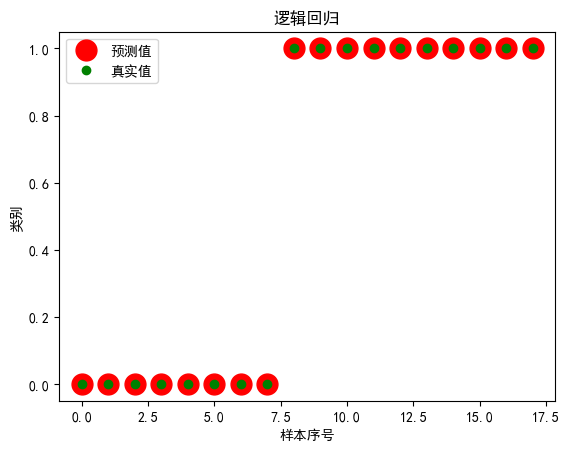

In [23]:
# 绘制预测值
plt.plot(result, "ro", ms=15, label='预测值')
plt.plot(test_y.values, "go", label='真实值')
plt.title("逻辑回归")
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.legend()
plt.show()